# Goeduhub Technologies - ML Training - Task 16
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#  Assignment-16: Gaussian Naive Bayes
**Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.**<br>
**Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.**

# Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/Titanic Dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Data

In [3]:
# dimensions of the dataset
df.ndim

2

In [4]:
df.shape

(891, 12)

In [5]:
df.size

10692

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


## Handle Missing Values

In [14]:
# check for null elements
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [16]:
# Since, 'Cabin' has more number of missing values. Replacing randomly with Classes Names will be a good choice.
df['Cabin'] = df['Cabin'].fillna(np.random.choice(['A','B','C','D','E','F']))

In [17]:
# remove samples with missing value on 'Embarked' feature
df.dropna(inplace=True)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization
## Analysis on Categorical Features:

In [19]:
def category_plot(var):
    fig = plt.figure(figsize=(14,4))
    fig.suptitle('Count of '+var ,fontsize=14)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.pie(df[var].value_counts(), labels=df[var].unique(), autopct='%.0f%%', explode=[0.03]*df[var].nunique())
    sns.countplot(df['Survived'],hue=df[var])

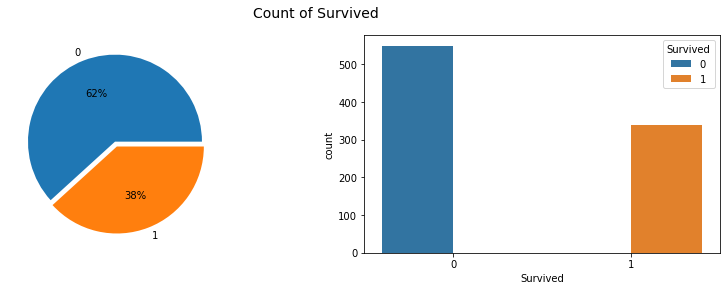

In [20]:
category_plot('Survived')

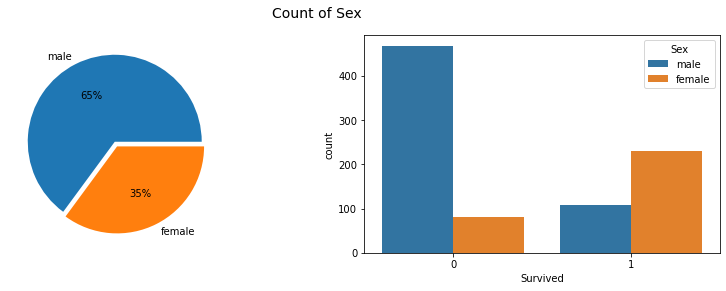

In [21]:
category_plot('Sex')

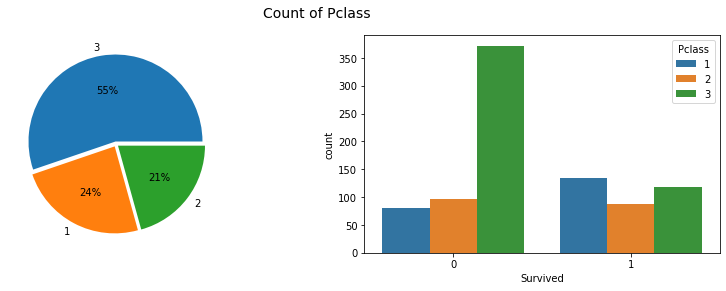

In [22]:
category_plot('Pclass')

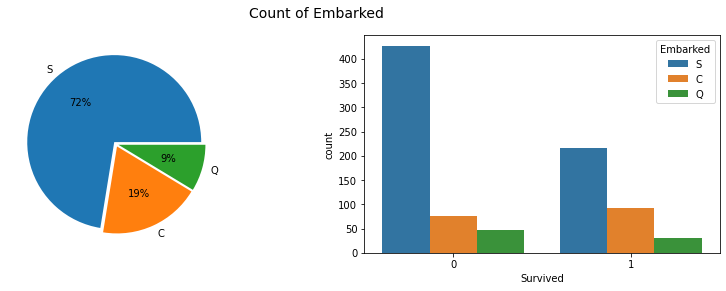

In [23]:
category_plot('Embarked')

## Analysis on Numerical Features:

In [24]:
def numerical_plot(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[var], kde=True, bins=10)
    plt.subplot(1,2,2)
    sns.barplot(x=df['Survived'], y=df[var])
    plt.suptitle(var,fontsize=14)

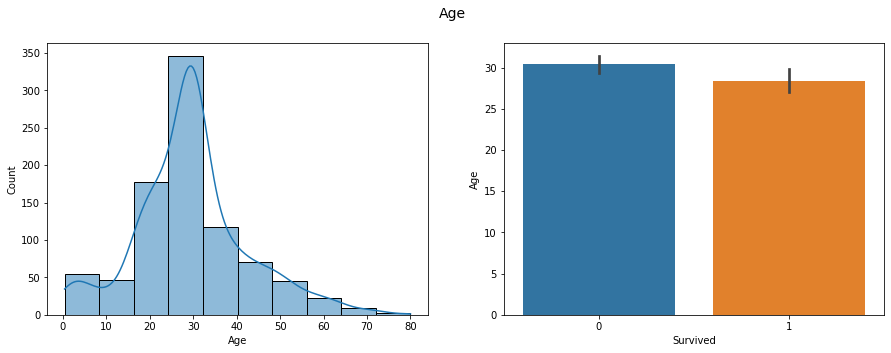

In [25]:
numerical_plot('Age')

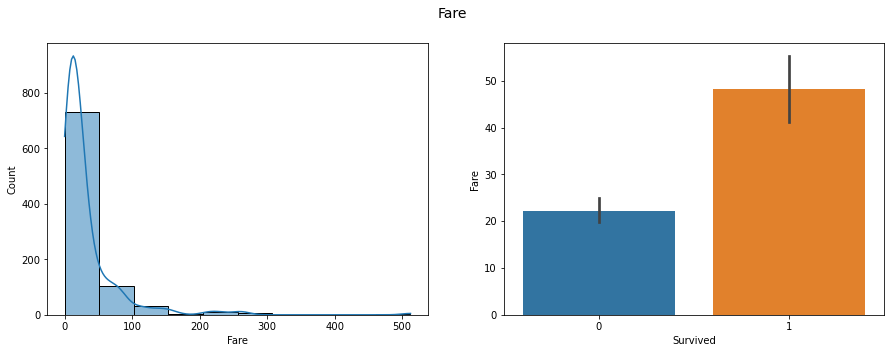

In [26]:
numerical_plot('Fare')

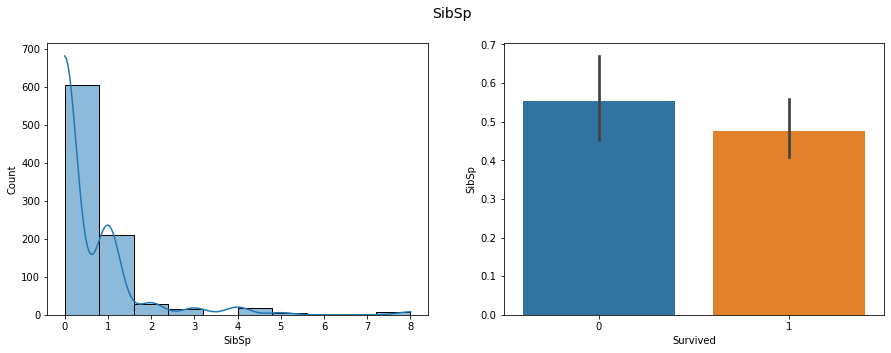

In [27]:
numerical_plot('SibSp')

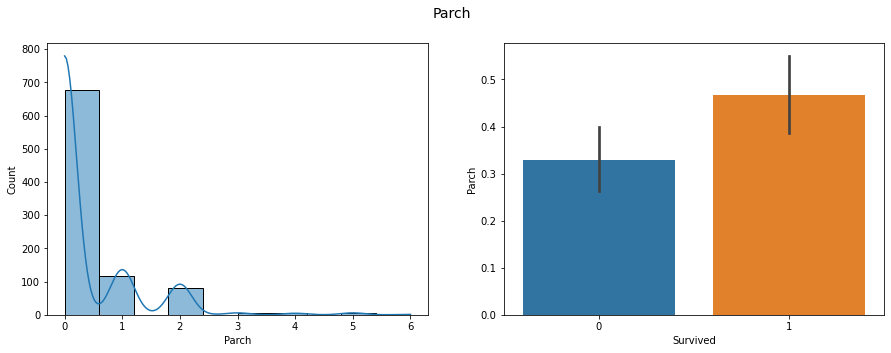

In [28]:
numerical_plot('Parch')

## Pair Plot

[]

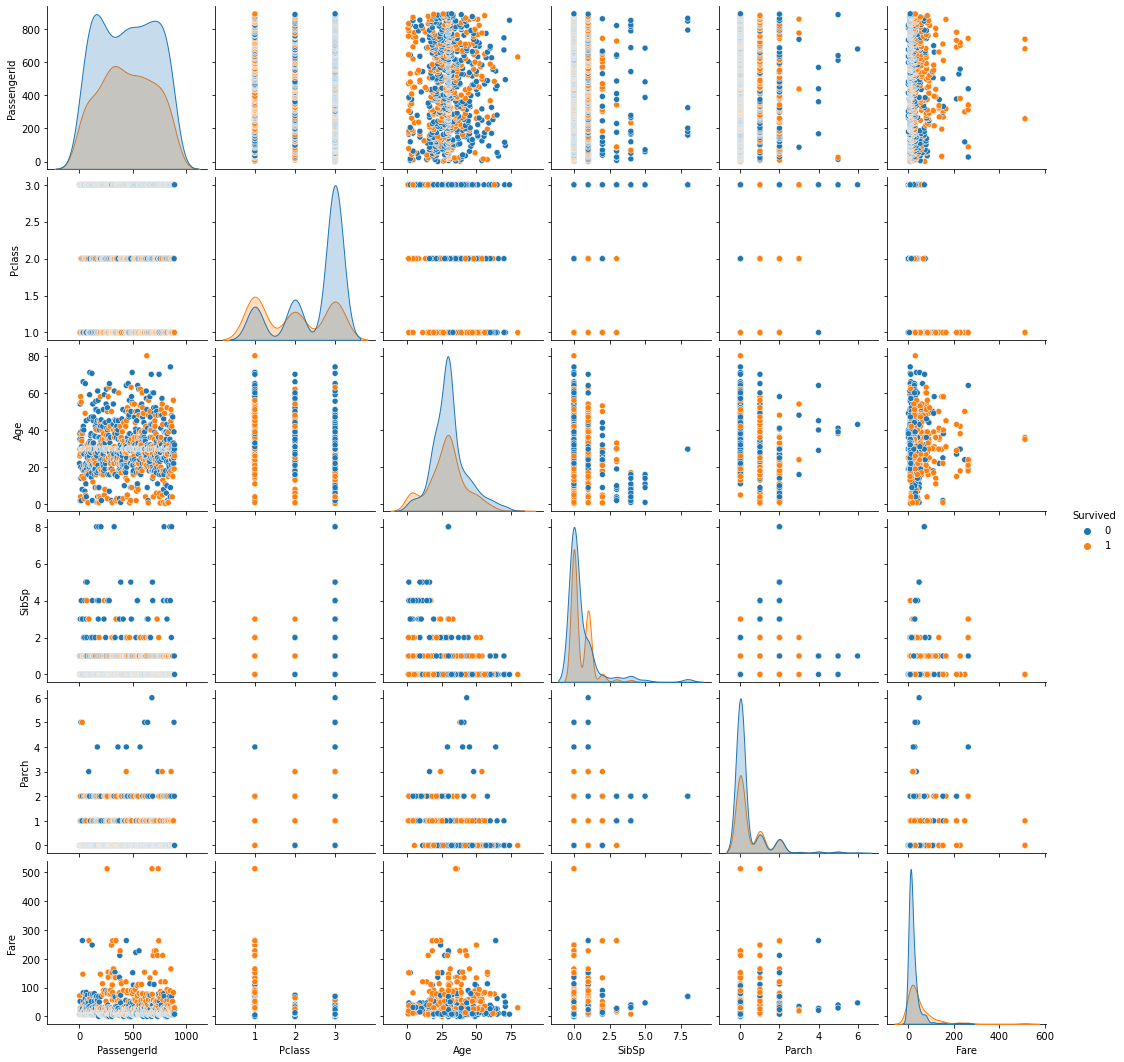

In [29]:
sns.pairplot(df,hue='Survived')
plt.plot()

## Correlation Matrix

Text(0.5, 1.0, 'Correlation')

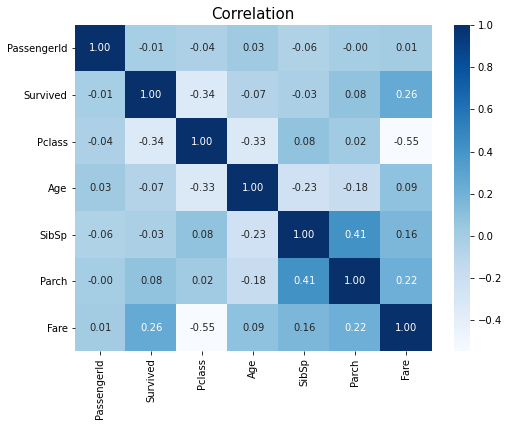

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='Blues', fmt='.2f', annot = True)
plt.title('Correlation',fontsize=15)

# ML Model
## Data PreProcessing

In [31]:
# Label Encode 'Gender' Feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['Sex'] = le.fit_transform(df['Sex'])

In [33]:
# these features does not contribute more in the prediction process
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


## Data Split

In [35]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [38]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (666, 4)
y_train: (666,)
X_test: (223, 4)
y_test: (223,)


## Berrnoulli - Naive Bayes Model

In [39]:
from sklearn import naive_bayes as nb
model = nb.BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

## Accuracy

In [40]:
print('Training accuracy:',model.score(X_train,y_train))
print('Testing accuracy:',model.score(X_test,y_test))

Training accuracy: 0.7297297297297297
Testing accuracy: 0.8026905829596412


## Gaussian - Naive Bayes Model

In [41]:
from sklearn import naive_bayes as nb
model = nb.GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

## Accuracy

In [42]:
print('Training accuracy:',model.score(X_train,y_train))
print('Testing accuracy:',model.score(X_test,y_test))

Training accuracy: 0.7492492492492493
Testing accuracy: 0.8295964125560538


## Gaussian - Naive Bayes Model has better accuracy.

In [43]:
predict = model.predict(X_test)

## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
cm

array([[132,  16],
       [ 22,  53]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

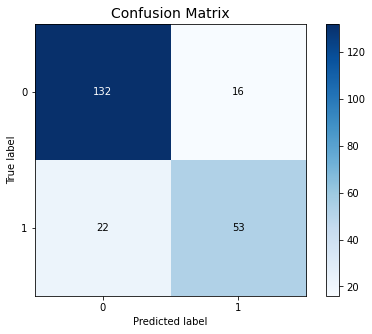

In [45]:
import scikitplot 
scikitplot.metrics.plot_confusion_matrix(y_test, predict, figsize=(7,5), title_fontsize=14)

In [46]:
# Evaluation Metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))
print("F1 Score:",metrics.f1_score(y_test, predict))

Accuracy: 0.8295964125560538
Precision: 0.7681159420289855
Recall: 0.7066666666666667
F1 Score: 0.736111111111111


## Classification Report

In [47]:
print('Classification Report\n',metrics.classification_report(y_test, predict))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       148
           1       0.77      0.71      0.74        75

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



# ROC Curve

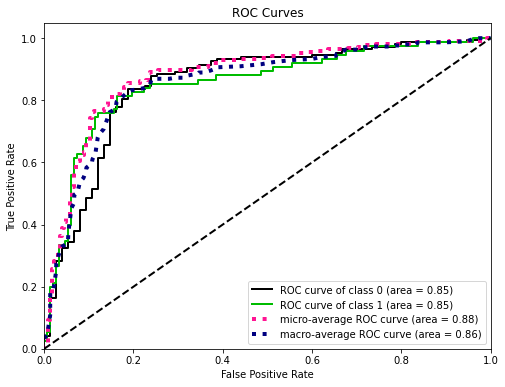

In [48]:
pred_probas = model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test,pred_probas,figsize=(8,6))
plt.show()

## Since, area covered is maximum, the model has good performance.